In [9]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
#Load Dataset
df = pd.read_csv("C:/Users/SAKSHI/Downloads/CL 1/Iris.csv")

# Display basic info
print("Number of Rows and Columns:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 Rows:")
display(df.head())

# Check Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Data Description
print("\nStatistical Summary:")
display(df.describe())

Number of Rows and Columns: (150, 6)

Column Names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 Rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



Missing Values in Each Column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Statistical Summary:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


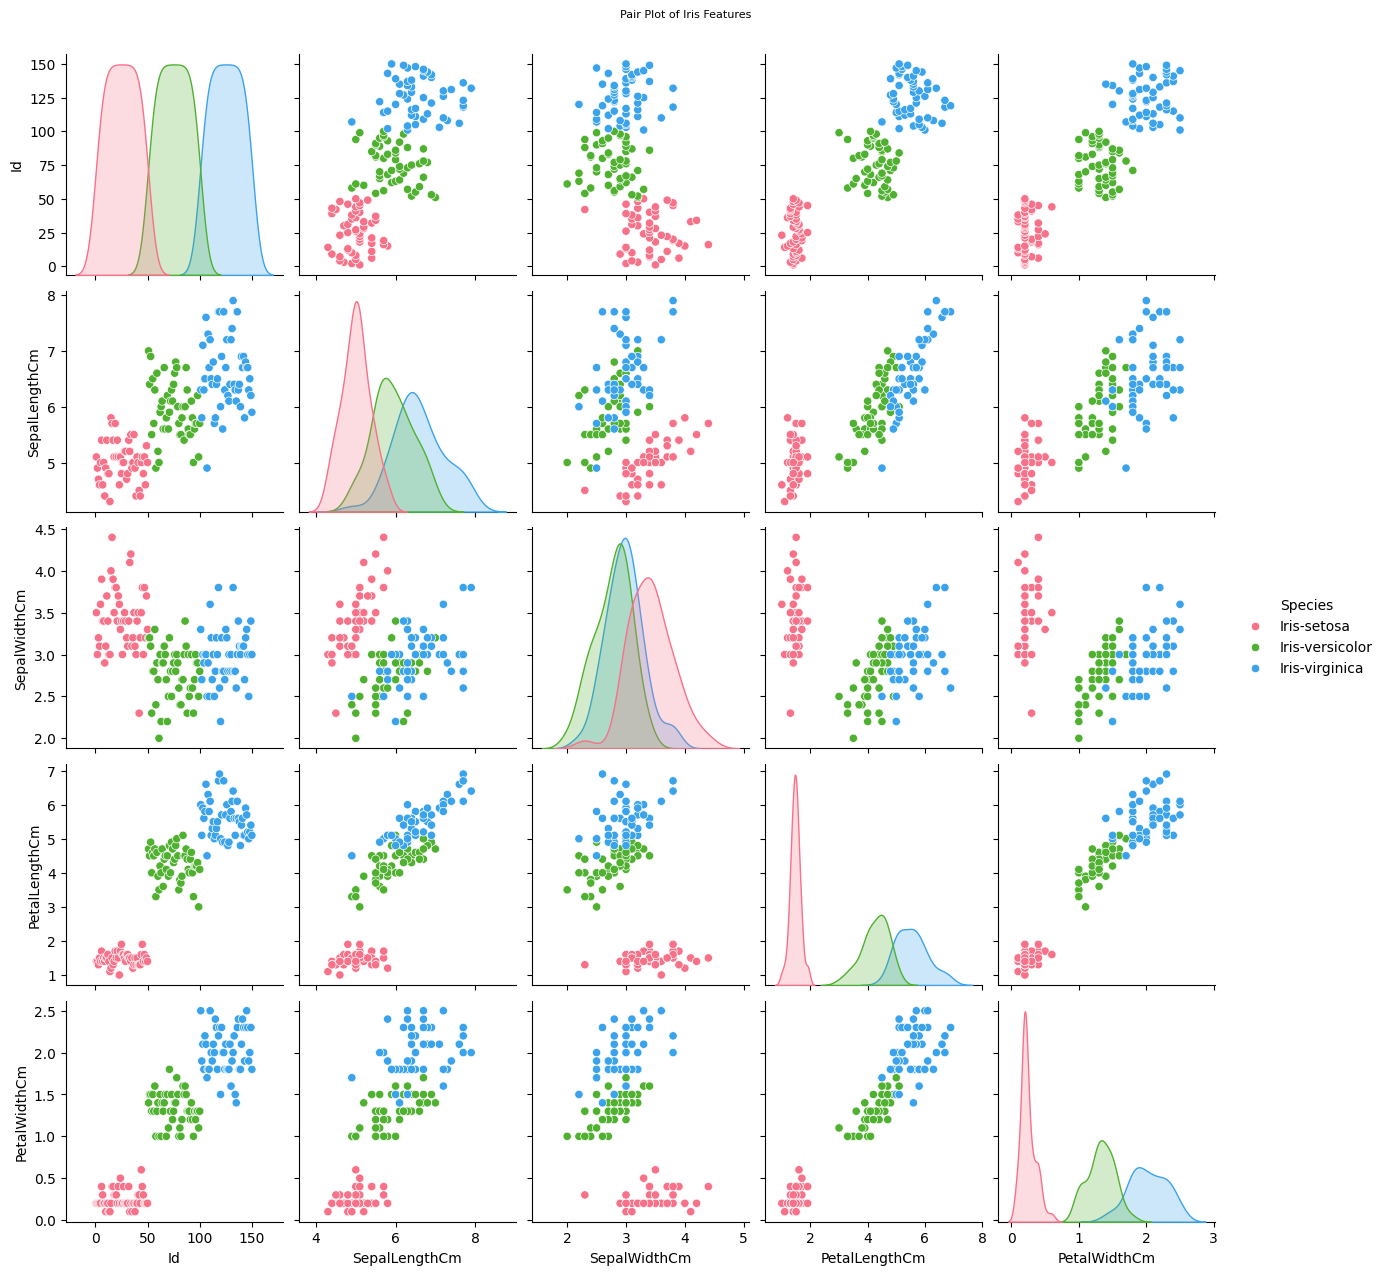

In [12]:
# Pairplot of Features
sns.pairplot(df, hue='Species', palette='husl')
plt.suptitle("Pair Plot of Iris Features", y=1.02, fontsize=8)
plt.show()

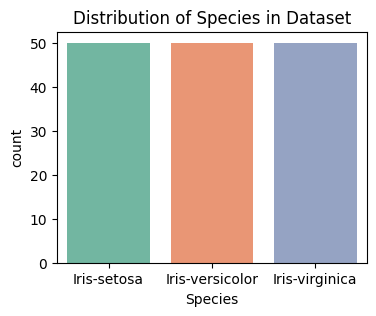

In [13]:
# Species Count
plt.figure(figsize=(4,3))
sns.countplot(x='Species', data=df, palette='Set2')
plt.title("Distribution of Species in Dataset")
plt.show()

In [15]:
# Select Features for Clustering
X = df.iloc[:, [1, 2, 3, 4]].values # numeric columns only

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding Optimal Number of Clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

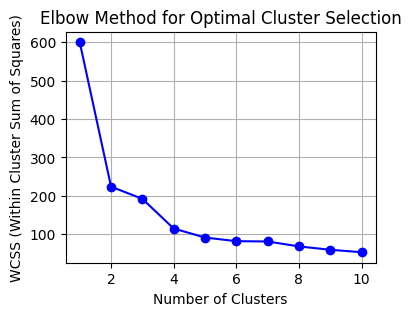

In [16]:
# Plot Elbow Graph
plt.figure(figsize=(4,3))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title("Elbow Method for Optimal Cluster Selection")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [17]:
# From elbow plot, optimal clusters = 3 (for Iris dataset)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add Cluster Column to DataFrame
df['Cluster'] = y_kmeans

print("\nCluster Centers (in Scaled Feature Space):")
print(kmeans.cluster_centers_)


Cluster Centers (in Scaled Feature Space):
[[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]


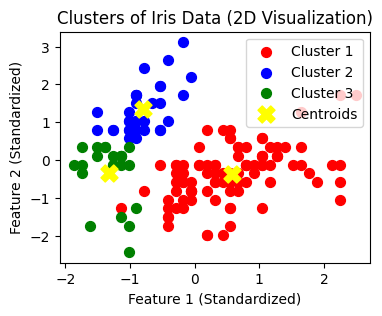

In [18]:
# Using first two principal features for 2D plot
plt.figure(figsize=(4,3))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

# Plot Cluster Centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=150, c='yellow', marker='X', label='Centroids')
plt.title("Clusters of Iris Data (2D Visualization)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()


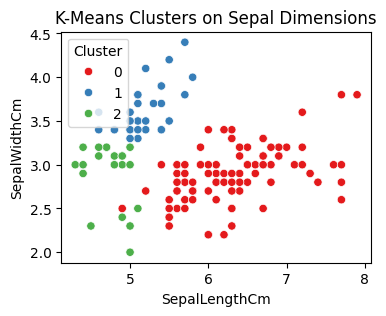

In [19]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=df, palette='Set1')
plt.title("K-Means Clusters on Sepal Dimensions")
plt.show()

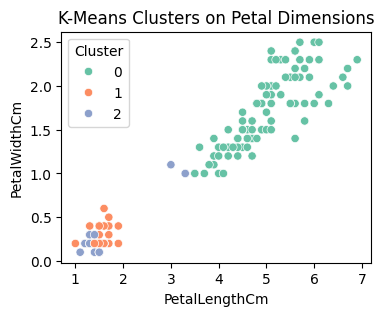

In [20]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', data=df, palette='Set2')
plt.title("K-Means Clusters on Petal Dimensions")
plt.show()


Comparison Between Actual Species and Cluster Labels:


Cluster,0,1,2
Species,,,
Iris-setosa,0,32,18
Iris-versicolor,46,0,4
Iris-virginica,50,0,0


<Figure size 400x300 with 0 Axes>

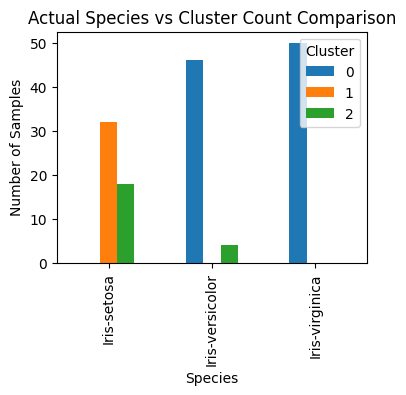

In [21]:
# Cross-tab between actual species and clusters
print("\nComparison Between Actual Species and Cluster Labels:")
ct = pd.crosstab(df['Species'], df['Cluster'])
display(ct)

# Cluster Visualization Summary
plt.figure(figsize=(4,3))
ct.plot(kind='bar', figsize=(4,3))
plt.title("Actual Species vs Cluster Count Comparison")
plt.xlabel("Species")
plt.ylabel("Number of Samples")
plt.show()
